In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# We are using the data with added features for visualisations
train_data= pd.read_csv('../data/processed/train_features.csv')

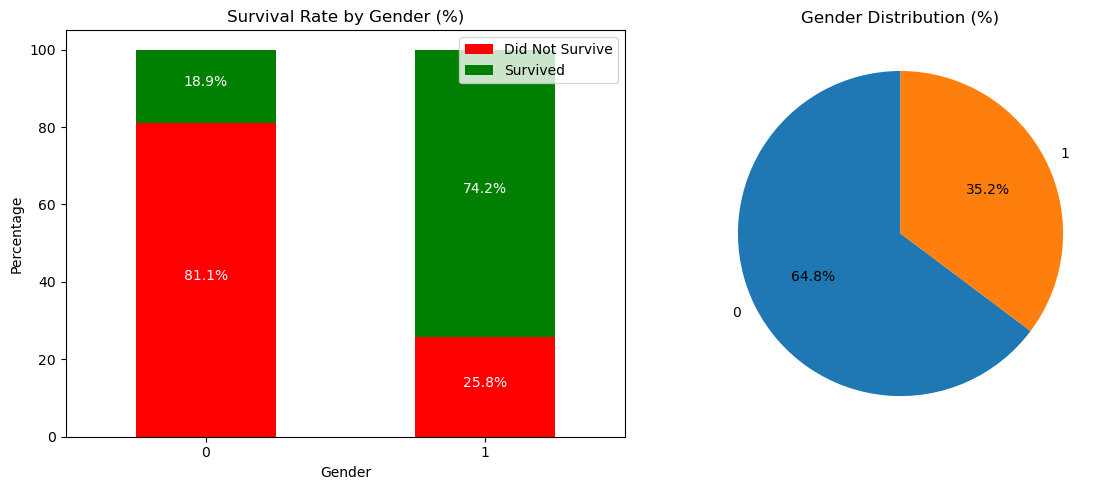

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Calculate percentages
sex_survival_pct = pd.crosstab(
    train_data['Sex'],
    train_data['Survived'],
    normalize='index'
) * 100

# Rename columns for clarity
sex_survival_pct.columns = ['Did Not Survive', 'Survived']

sex_survival_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color = ['red','green']
)

axes[0].set_title("Survival Rate by Gender (%)")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Gender")
axes[0].tick_params(axis='x', labelrotation=0)


# Add percentage labels inside bars
for i, sex in enumerate(sex_survival_pct.index):
    no_survive = sex_survival_pct.loc[sex, 'Did Not Survive']
    survive = sex_survival_pct.loc[sex, 'Survived']
    
    axes[0].text(i, no_survive/2, f"{no_survive:.1f}%", ha='center', color='white')
    axes[0].text(i, no_survive + survive/2, f"{survive:.1f}%", ha='center', color='white')

# Plot 2: Percentage of Male vs Female
gender_pct = train_data['Sex'].value_counts(normalize=True) * 100

axes[1].pie(
    gender_pct,
    labels=gender_pct.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Gender Distribution (%)")

plt.tight_layout()


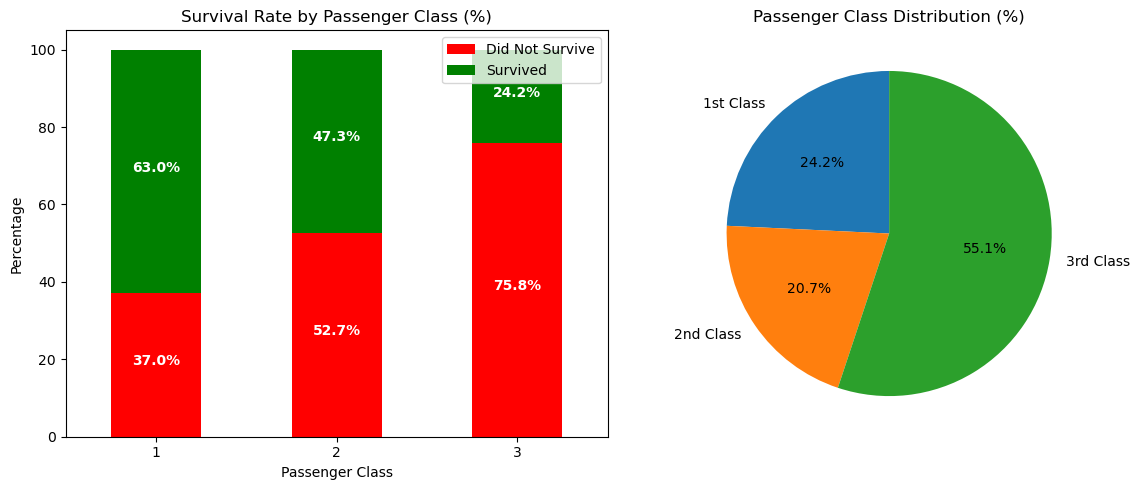

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Calculate survival percentages by Pclass
pclass_survival_pct = pd.crosstab(
    train_data['Pclass'],
    train_data['Survived'],
    normalize='index'
) * 100

# Rename columns for clarity
pclass_survival_pct.columns = ['Did Not Survive', 'Survived']

# Plot stacked bar chart with colors
pclass_survival_pct.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],
    color=['red', 'green']
)

# Titles and labels
axes[0].set_title("Survival Rate by Passenger Class (%)")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Passenger Class")
axes[0].tick_params(axis='x', labelrotation=0)


# Add percentage labels inside bars
labels=['1st Class', '2nd Class', '3rd Class'],
for i, pclass in enumerate(pclass_survival_pct.index):
    no_survive = pclass_survival_pct.loc[pclass, 'Did Not Survive']
    survive = pclass_survival_pct.loc[pclass, 'Survived']
    
    axes[0].text(i, no_survive/2, f"{no_survive:.1f}%", ha='center', color='white', fontweight='bold')
    axes[0].text(i, no_survive + survive/2, f"{survive:.1f}%", ha='center', color='white', fontweight='bold')


# Plot 2: Pclass distribution pie chart
class_counts = train_data['Pclass'].value_counts().sort_index()

axes[1].pie(
    class_counts,
    labels=['1st Class', '2nd Class', '3rd Class'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Passenger Class Distribution (%)")

plt.tight_layout()
plt.show()

### Data Visualisation 3
### To visualise the percentage of survivors against the total in different Titles

### Plotting the percentage of survivors against the total in each Title as a bar chart

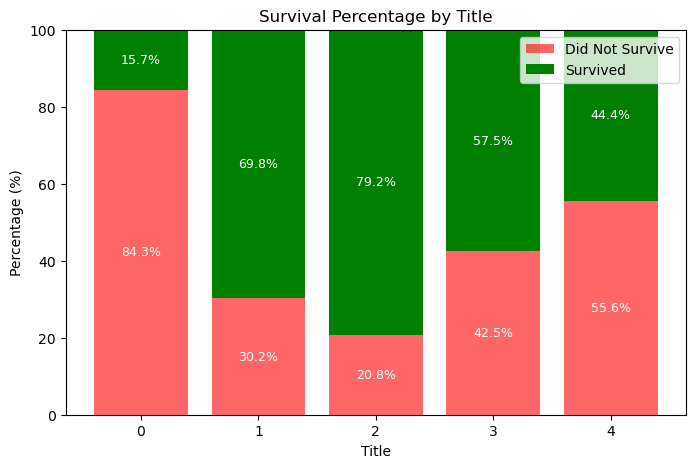

In [28]:
# Total and survived counts
total_counts = train_data["Title"].value_counts().sort_index()
survived_counts = train_data.groupby("Title")["Survived"].sum().sort_index()

# Percentages
survived_percent = (survived_counts / total_counts) * 100
not_survived_percent = 100 - survived_percent

plt.figure(figsize=(8, 5))

# Did not survive (red)
bars_not_survived = plt.bar(
    total_counts.index,
    not_survived_percent,
    label="Did Not Survive",
    color="red",
    alpha=0.6
)

# Survived (green) stacked on top
bars_survived = plt.bar(
    total_counts.index,
    survived_percent,
    bottom=not_survived_percent,
    label="Survived",
    color="green"
)

# Add percentage labels (FIXED)
for i, title in enumerate(total_counts.index):
    # Did not survive %
    plt.text(
        i,
        not_survived_percent.iloc[i] / 2,
        f"{not_survived_percent.iloc[i]:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=9
    )

    # Survived %
    plt.text(
        i,
        not_survived_percent.iloc[i] + survived_percent.iloc[i] / 2,
        f"{survived_percent.iloc[i]:.1f}%",
        ha="center",
        va="center",
        color="white",
        fontsize=9
    )

plt.ylabel("Percentage (%)")
plt.xlabel("Title")
plt.title("Survival Percentage by Title")
plt.ylim(0, 100)
plt.legend()
plt.show()


Visualise the percentage of survivors in each Age group

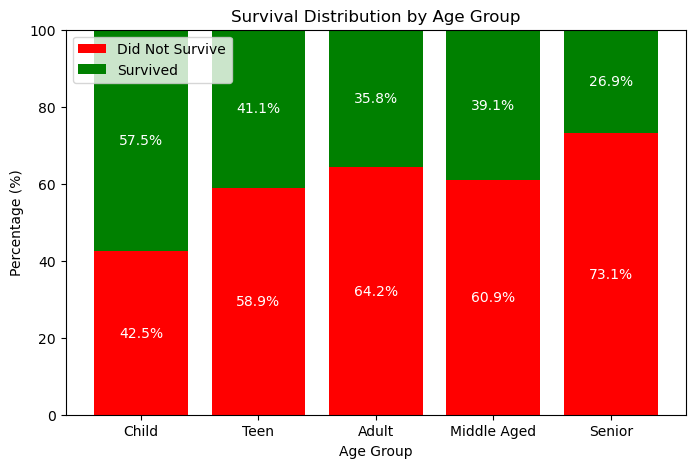

In [32]:
# Define correct order
age_order = ['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior']

train_data['AgeBin'] = pd.Categorical(
    train_data['AgeBin'],
    categories=age_order,
    ordered=True
)

# Create percentage table (stacked)
stacked_data = (
    train_data
        .groupby(['AgeBin', 'Survived'])
        .size()
        .unstack()
        .reindex(age_order)  # ensures correct order
        .apply(lambda x: x / x.sum() * 100, axis=1)
)

# Plot stacked bars
plt.figure(figsize=(8,5))

# Bottom (Did Not Survive = 0)
plt.bar(
    stacked_data.index,
    stacked_data[0],
    color='red',
    label='Did Not Survive'
)

# Top (Survived = 1)
plt.bar(
    stacked_data.index,
    stacked_data[1],
    bottom=stacked_data[0],
    color='green',
    label='Survived'
)

# Add percentage labels inside bars
for i in range(len(stacked_data)):
    # Red section
    plt.text(i,
             stacked_data.iloc[i, 0] / 2,
             f"{stacked_data.iloc[i, 0]:.1f}%",
             ha='center',
             va='center',
             color='white')

    # Green section
    plt.text(i,
             stacked_data.iloc[i, 0] + stacked_data.iloc[i, 1] / 2,
             f"{stacked_data.iloc[i, 1]:.1f}%",
             ha='center',
             va='center',
             color='white')

plt.ylabel("Percentage (%)")
plt.xlabel("Age Group")
plt.title("Survival Distribution by Age Group")
plt.ylim(0, 100)
plt.legend()

plt.show()

Survival percentage for Age+Sex

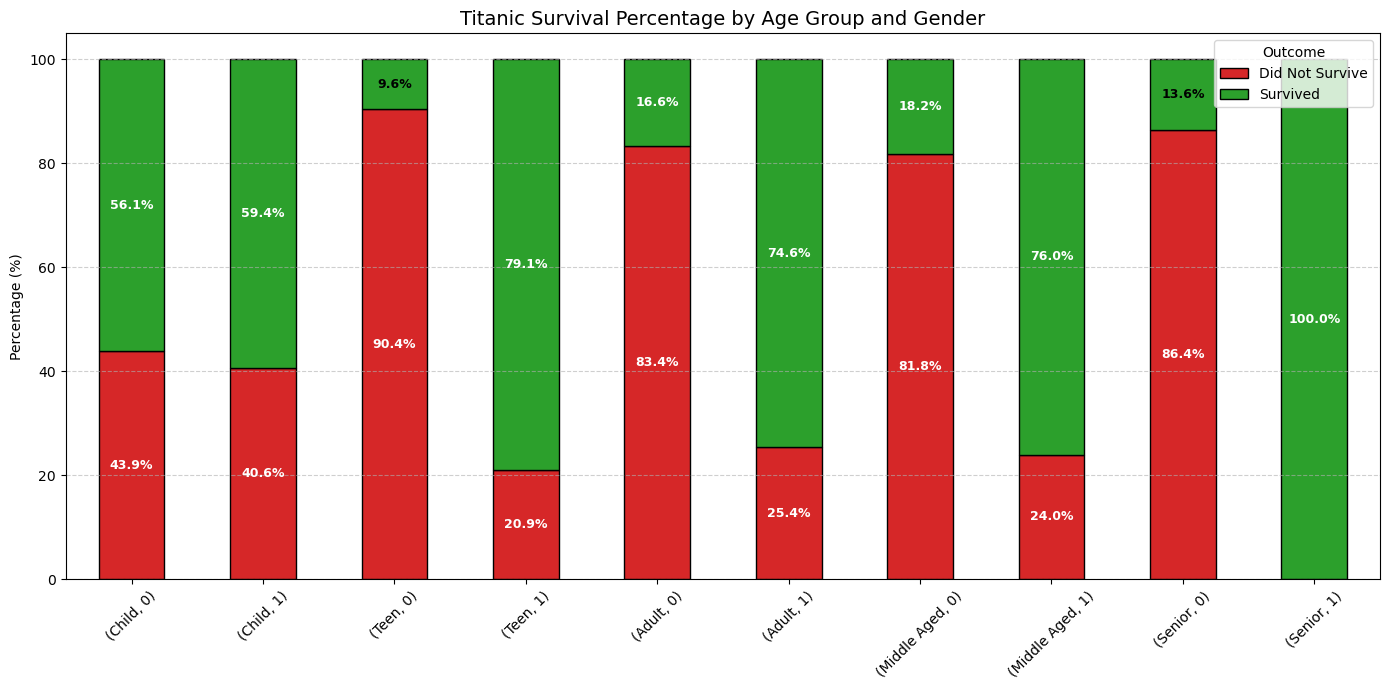

In [ ]:
# Calculate survival percentages
grouped_age_gender = (
    train_data
    .groupby(['age_bin', 'Sex'])['Survived']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

grouped_age_gender.columns = ['Did Not Survive', 'Survived']

# Optional: enforce proper age order if needed
age_order = ['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior']
grouped_age_gender = grouped_age_gender.reindex(age_order, level=0)

# Optional: cleaner x-axis labels
'''grouped_age_gender.index = [
    f"{age} - {sex.capitalize()}"
    for age, sex in grouped_age_gender.index
]'''

# Plot stacked bar chart
ax = grouped_age_gender.plot(
    kind='bar',
    stacked=True,
    color=['#d62728', '#2ca02c'],  # red, green
    figsize=(14,7),
    edgecolor='black'
)

plt.title('Titanic Survival Percentage by Age Group and Gender', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 🔹 Add percentage labels inside bars
for i, (idx, row) in enumerate(grouped_age_gender.iterrows()):
    cumulative = 0
    for value in row:
        if value > 0:
            color = 'white' if value > 15 else 'black'
            ax.text(
                i,
                cumulative + value / 2,
                f'{value:.1f}%',
                ha='center',
                va='center',
                color=color,
                fontsize=9,
                fontweight='bold'
            )
        cumulative += value

plt.tight_layout()
plt.show()

Survival percentage by Family size

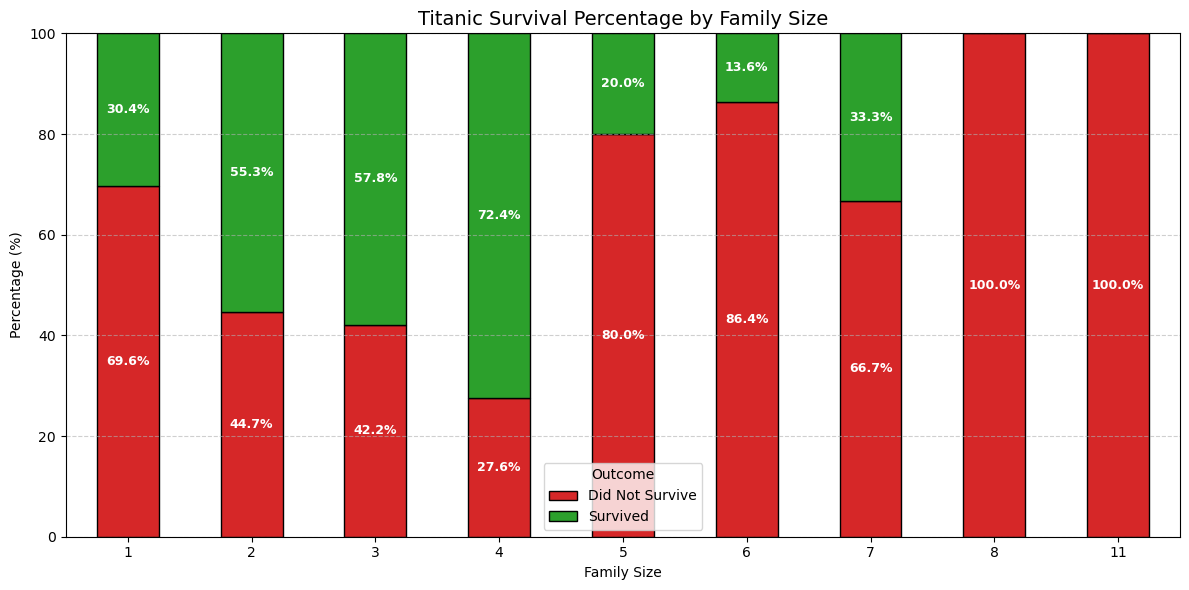

In [ ]:
# Calculate survival percentages
grouped_family = (
    train_data
    .groupby('FamilySize')['Survived']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

grouped_family.columns = ['Did Not Survive', 'Survived']
grouped_family = grouped_family.sort_index()

# Plot
ax = grouped_family.plot(
    kind='bar',
    stacked=True,
    color=['#d62728', '#2ca02c'],
    figsize=(12,6),
    edgecolor='black'
)

plt.title('Titanic Survival Percentage by Family Size', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Family Size')
plt.legend(title='Outcome')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 🔹 Add percentage labels inside bars
for i, (idx, row) in enumerate(grouped_family.iterrows()):
    cumulative = 0
    for value in row:
        if value > 0:  # avoid labeling empty sections
            ax.text(
                i,
                cumulative + value / 2,
                f'{value:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )
        cumulative += value

plt.tight_layout()
plt.show()

Sex + Pclass

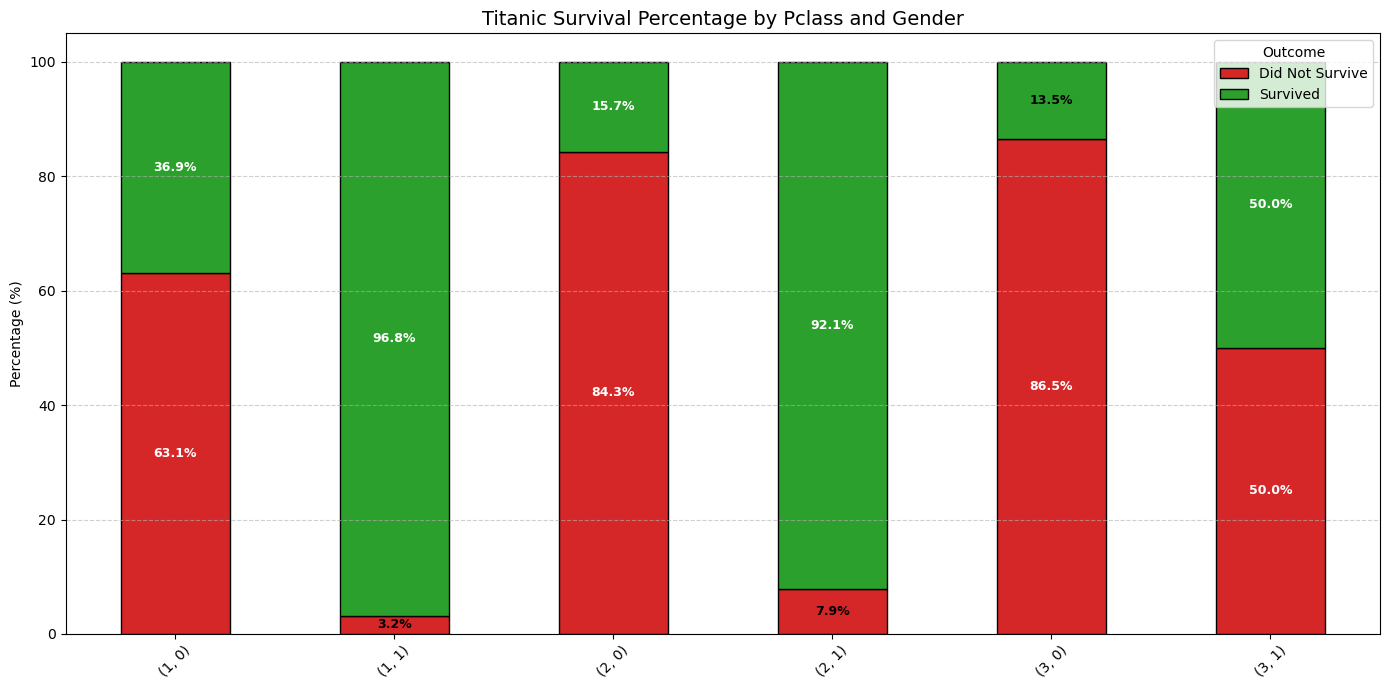

In [ ]:
# Calculate survival percentages
grouped_sex_pclass = (
    train_data
    .groupby(['Pclass', 'Sex'])['Survived']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

grouped_sex_pclass.columns = ['Did Not Survive', 'Survived']

# Optional: cleaner x-axis labels
'''grouped_sex_pclass.index = [
    f"Pclass {pclass} - {sex.capitalize()}"
    for pclass, sex in grouped_sex_pclass.index
]'''

# Plot
ax = grouped_sex_pclass.plot(
    kind='bar',
    stacked=True,
    color=['#d62728', '#2ca02c'],
    figsize=(14,7),
    edgecolor='black'
)

plt.title('Titanic Survival Percentage by Pclass and Gender', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add percentage labels
for i, (idx, row) in enumerate(grouped_sex_pclass.iterrows()):
    cumulative = 0
    for value in row:
        if value > 0:
            color = 'white' if value > 15 else 'black'
            ax.text(
                i,
                cumulative + value / 2,
                f'{value:.1f}%',
                ha='center',
                va='center',
                color=color,
                fontsize=9,
                fontweight='bold'
            )
        cumulative += value

plt.tight_layout()
plt.show()

AgeBins + Pclass

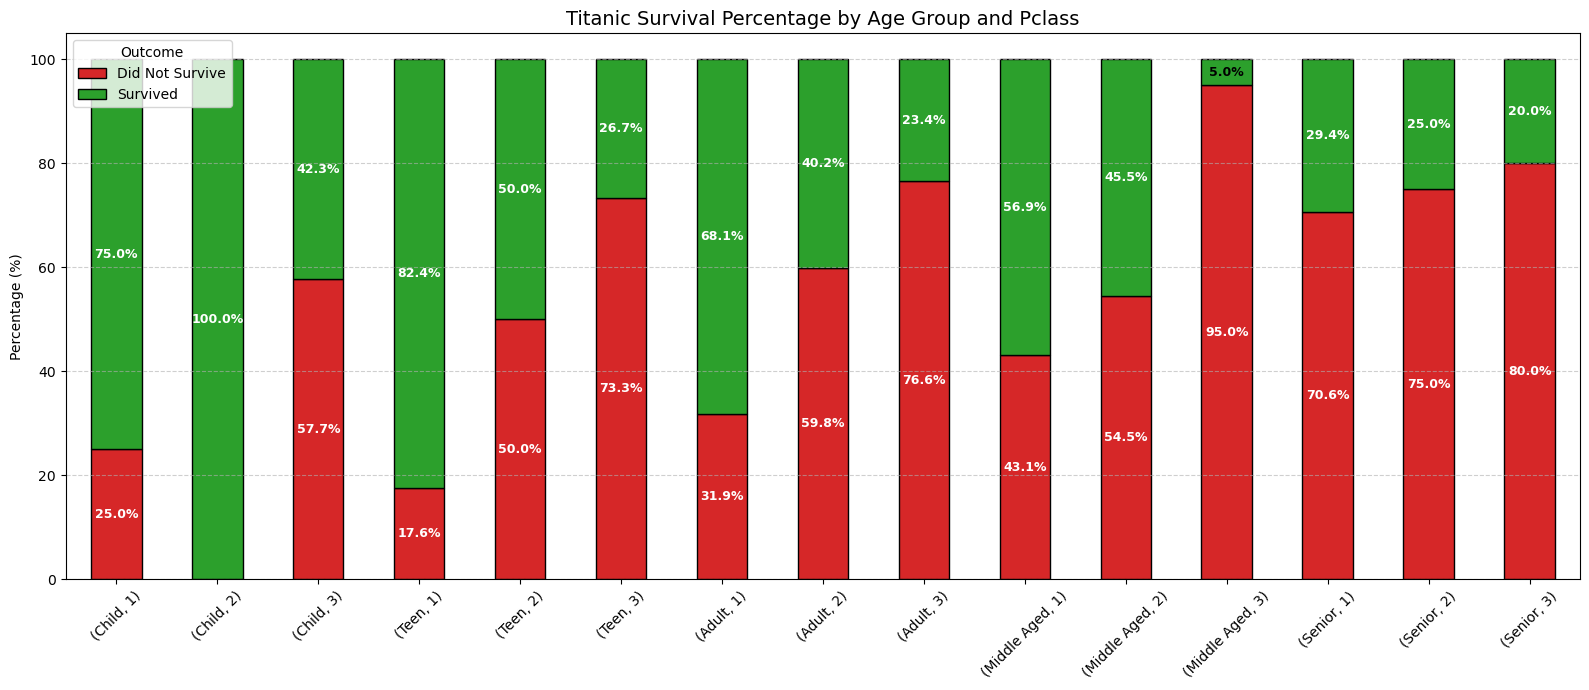

In [ ]:
# Calculate survival percentages
grouped_age_pclass = (
    train_data
    .groupby(['age_bin', 'Pclass'])['Survived']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

grouped_age_pclass.columns = ['Did Not Survive', 'Survived']

# Optional: enforce age order
age_order = ['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior']
grouped_age_pclass = grouped_age_pclass.reindex(age_order, level=0)

# Optional: cleaner x-axis labels
'''grouped_age_pclass.index = [
    f"{age} - Pclass {pclass}"
    for age, pclass in grouped_age_pclass.index
]'''

# Plot
ax = grouped_age_pclass.plot(
    kind='bar',
    stacked=True,
    color=['#d62728', '#2ca02c'],
    figsize=(16,7),
    edgecolor='black'
)

plt.title('Titanic Survival Percentage by Age Group and Pclass', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add percentage labels
for i, (idx, row) in enumerate(grouped_age_pclass.iterrows()):
    cumulative = 0
    for value in row:
        if value > 0:
            color = 'white' if value > 15 else 'black'
            ax.text(
                i,
                cumulative + value / 2,
                f'{value:.1f}%',
                ha='center',
                va='center',
                color=color,
                fontsize=9,
                fontweight='bold'
            )
        cumulative += value

plt.tight_layout()
plt.show()